<a href="https://colab.research.google.com/github/Ojomiloju/Sales-Prediction/blob/master/Sales_Prediction_Pycaret_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret

     |████████████████████████████████| 194kB 3.3MB/s 
     |████████████████████████████████| 7.0MB 6.7MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 133kB 16.9MB/s 
     |████████████████████████████████| 266kB 15.7MB/s 
     |████████████████████████████████| 102kB 6.4MB/s 
     |████████████████████████████████| 1.6MB 15.5MB/s 
     |████████████████████████████████| 63.9MB 67kB/s 
     |████████████████████████████████| 1.2MB 43.4MB/s 
     |████████████████████████████████| 389kB 42.5MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 3.3MB 42.4MB/s 
     |████████████████████████████████| 235kB 45.6MB/s 
     |████████████████████████████████| 604kB 31.1MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 2.1MB 40.6MB/s 
     |████████████████████████████████| 552kB 39.3MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
    

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
test = pd.read_csv('/content/gdrive/My Drive/dsn-ai-oau-july-challenge/test.csv')
train = pd.read_csv('/content/gdrive/My Drive/dsn-ai-oau-july-challenge/train.csv')
sample = pd.read_csv('/content/gdrive/My Drive/dsn-ai-oau-july-challenge/sample_submission.csv')

In [4]:
test['Product_Supermarket_Sales'] = 100

In [5]:
train.shape

(3742, 13)

In [6]:
df = pd.concat([train,test])

In [7]:
df = df.set_index('Product_Supermarket_Identifier')

In [8]:
df.head()

,Product_Identifier,Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
Product_Supermarket_Identifier,,,,,,,,,,,,
DRB24_CHUKWUDI017,DRB24,CHUKWUDI017,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,NaN,Cluster 2,Supermarket Type1,4633.97
FDR31_CHUKWUDI019,FDR31,CHUKWUDI019,NaN,Normal Fat,0.086078,Fruits and Vegetables,359.53,1992,Small,Cluster 1,Grocery Store,729.05
FDP16_CHUKWUDI017,FDP16,CHUKWUDI017,18.600,Low Fat,0.039517,Frozen Foods,609.20,2014,NaN,Cluster 2,Supermarket Type1,14740.81
FDY16_CHUKWUDI027,FDY16,CHUKWUDI027,NaN,Normal Fat,0.091780,Frozen Foods,456.32,1992,Medium,Cluster 3,Supermarket Type3,16137.33
FDY48_CHUKWUDI046,FDY48,CHUKWUDI046,14.000,Low Fat,0.023735,Baking Goods,258.08,2004,Small,Cluster 1,Supermarket Type1,4613.99


In [9]:
df["Product_Weight"].fillna(12.908838, inplace = True)
df["Supermarket _Size"].fillna("Medium", inplace = True)

In [10]:
df['Supermarket_Opening_Year'] = 2017 - df['Supermarket_Opening_Year']

In [11]:
df.drop(['Product_Identifier','Supermarket_Identifier'], axis = 1, inplace = True)

In [12]:
train = df[0:3742]
test = df[3742:]

In [13]:
train.shape

(3742, 10)

In [14]:
import matplotlib.pyplot as plt

(array([ 993., 1002.,  844.,  458.,  241.,  117.,   56.,   20.,    8.,
           3.]),
 array([   83.23 ,  2936.183,  5789.136,  8642.089, 11495.042, 14347.995,
        17200.948, 20053.901, 22906.854, 25759.807, 28612.76 ]),
 <a list of 10 Patch objects>)

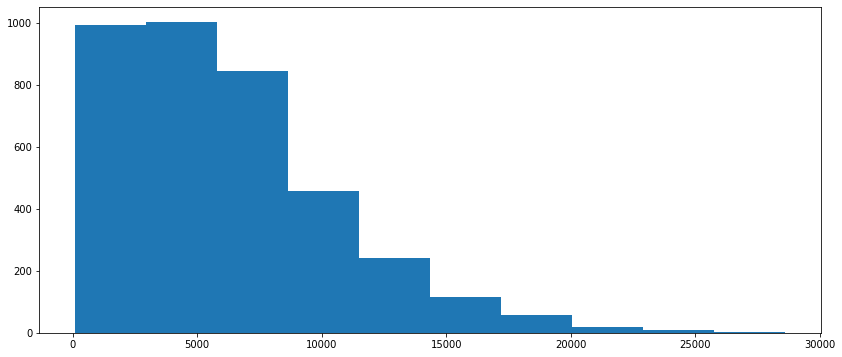

In [15]:
plt.figure(figsize = (14, 6))
plt.hist(train["Product_Supermarket_Sales"])

In [16]:
train = train[train["Product_Supermarket_Sales"] <= 2000]

(array([ 57., 150.,  88.,  93.,  71.,  80.,  56.,  57.,  45.,  52.]),
 array([  83.23 ,  273.981,  464.732,  655.483,  846.234, 1036.985,
        1227.736, 1418.487, 1609.238, 1799.989, 1990.74 ]),
 <a list of 10 Patch objects>)

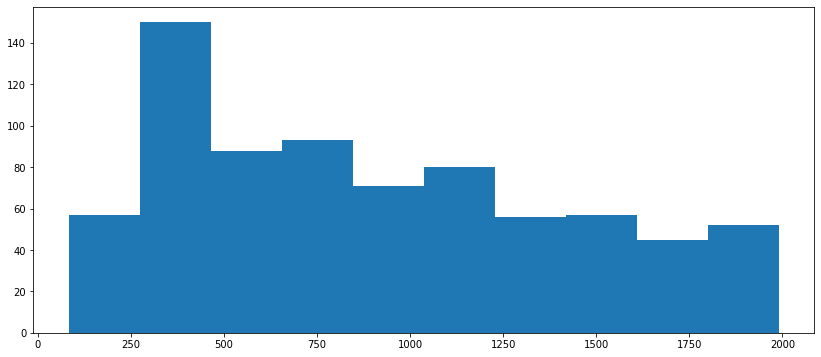

In [17]:
plt.figure(figsize = (14, 6))
plt.hist(train["Product_Supermarket_Sales"])

In [18]:
from pycaret.regression import *

exp_reg = setup(train, target = "Product_Supermarket_Sales")

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4803
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(749, 10)"
4,Missing Values,False
5,Numeric Features,3
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [19]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,335.601400,171604.208700,412.141400,0.369800,0.523100,0.534200
1,Lasso Least Angle Regression,343.580800,174979.895900,416.368000,0.358900,0.538700,0.564500
2,Lasso Regression,339.147600,176795.399800,418.405700,0.351400,0.524800,0.532600
3,TheilSen Regressor,340.022700,177422.598400,419.408400,0.350000,0.524700,0.529500
4,Ridge Regression,342.888200,179857.171000,422.046100,0.340600,0.528600,0.537300
5,Linear Regression,343.922100,181178.136300,423.530000,0.335700,0.530100,0.538000
6,Huber Regressor,342.473700,182309.032200,424.931100,0.331900,0.526400,0.519200
7,AdaBoost Regressor,376.553500,193372.508800,438.643100,0.293100,0.601700,0.695800
8,Elastic Net,373.858000,195624.076300,441.089700,0.287100,0.584800,0.647600
9,Extreme Gradient Boosting,360.467200,195643.193000,439.625100,0.284900,0.548500,0.567800


In [27]:
model = create_model("omp")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,387.7787,209907.5723,458.1567,0.1502,0.5719,0.6235
1,317.6975,156124.0525,395.1254,0.3529,0.4910,0.4585
2,312.5657,144885.7088,380.6386,0.4188,0.4969,0.4482
3,380.5695,195950.6384,442.6631,0.3871,0.5262,0.5393
4,279.6932,125115.7178,353.7170,0.4464,0.4920,0.5167
5,281.6826,128548.8705,358.5371,0.5842,0.4731,0.4666
6,310.9729,152556.2584,390.5845,0.5363,0.4618,0.4512
7,323.8766,167936.3435,409.8004,0.3549,0.5181,0.4923
8,370.4762,202381.6113,449.8684,0.3272,0.6123,0.7107
9,390.7013,232635.3139,482.3228,0.1402,0.5882,0.6351


In [28]:
tuned_model = tune_model("omp")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,383.6094,206003.2074,453.8758,0.1660,0.5696,0.6201
1,315.3888,157154.2750,396.4269,0.3486,0.4892,0.4537
2,312.0602,145021.0118,380.8162,0.4183,0.5003,0.4561
3,378.7627,193777.0261,440.2011,0.3939,0.5231,0.5338
4,281.4856,125666.7352,354.4950,0.4440,0.4901,0.5146
5,281.3810,126872.8018,356.1921,0.5897,0.4658,0.4587
6,308.9341,151415.2964,389.1212,0.5398,0.4586,0.4461
7,323.1540,167384.8953,409.1270,0.3570,0.5161,0.4903
8,367.7316,201730.8204,449.1445,0.3294,0.6106,0.7060
9,389.8141,232016.9981,481.6814,0.1425,0.5883,0.6351


In [29]:
predictions = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,303.5546,140571.7813,374.929,0.4301,0.5005,0.5006


In [30]:
finalize_model(tuned_model)

OrthogonalMatchingPursuit(fit_intercept=True, n_nonzero_coefs=4,
                          normalize=False, precompute='auto', tol=None)

In [31]:
save_model(tuned_model, 'sales_prediction_omp')

Transformation Pipeline and Model Succesfully Saved


In [32]:
test.drop("Product_Supermarket_Sales", axis = 1, inplace = True)

KeyError: ignored

In [33]:
predictions = predict_model(tuned_model, data = test)
sample["Product_Supermarket_Sales"] = predictions['Label']
sample.to_csv('submission_sales_prediction.csv',index= False)
sample.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,FDC15_CHUKWUDI049,1392.1873
1,NCY06_CHUKWUDI018,1308.8723
2,DRB24_CHUKWUDI035,1541.2196
3,NCG54_CHUKWUDI018,1458.8686
4,NCA42_CHUKWUDI017,1433.8866
